<h1 align="center" style="font-family:courier; background-color:powderblue;"> Student Name : Sartaj Ahmed Salman  </h1> 
<h2 align="center" style="background-color:lightgray;"> Email: s2140019@edu.cc.uec.ac.jp  </h2>                              
<h3 align="center" style="background-color:lightgray;" >Phd Student At UEC Tokyo, Japan</h3> 

<h2 align="center" style="font-family:courier; background-color:powderblue;"> Address:    From Skardu, Pakistan </h2> 

# Two Way ANOVA

In [31]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
df = pd.DataFrame({'water': np.repeat(["daily","weekly"],15),
'sun': np.tile(np.repeat(["low","medium","high"],5),2),
'height':[6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})
df.sample(10)

,water,sun,height
28,weekly,high,7
11,daily,high,6
14,daily,high,7
24,weekly,medium,4
15,weekly,low,3
22,weekly,medium,4
1,daily,low,6
7,daily,medium,6
12,daily,high,7
6,daily,medium,5


C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

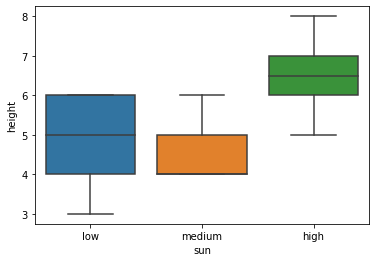

In [33]:
sns.boxplot(df['sun'],df['height'])

C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

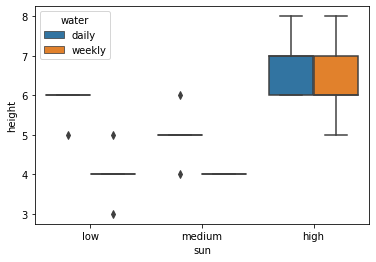

In [34]:
sns.boxplot(df['sun'],df['height'],df['water'])

In [35]:
#Perform one way Anova
import statsmodels.api as sm 
from statsmodels.formula.api import ols
model = ols('height ~ sun', data = df).fit()
sm.stats.anova_lm(model, type=2)


,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,24.866667,12.433333,14.105042,0.000064
Residual,27.0,23.800000,0.881481,NaN,NaN


In [36]:
model = ols('height ~ C(sun)+C(water)+C(sun):C(water)', data = df).fit()
table = sm.stats.anova_lm(model, type=2)
print(table)

                   df     sum_sq    mean_sq        F    PR(>F)
C(sun)            2.0  24.866667  12.433333  23.3125  0.000002
C(water)          1.0   8.533333   8.533333  16.0000  0.000527
C(sun):C(water)   2.0   2.466667   1.233333   2.3125  0.120667
Residual         24.0  12.800000   0.533333      NaN       NaN


In [37]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect Sun
res.tukey_hsd(df=df, res_var='height', xfac_var='sun', anova_model='height ~ C(sun)+C(water)+C(sun):C(water)')
new=res.tukey_summary
print(new)

   group1  group2  Diff    Lower    Upper   q-value   p-value
0     low  medium   0.4 -0.41546  1.21546  1.732051  0.452202
1     low    high   1.7  0.88454  2.51546  7.361216  0.001000
2  medium    high   2.1  1.28454  2.91546  9.093267  0.001000


In [38]:
from statannotations.Annotator import Annotator
plotting_parameters = {
    'data':    df,
    'x':       'sun',
    'y':       'height',
    
}

pairs = [('low', 'medium'),
         ('low', 'high'),
         ('medium', 'high')]

In [39]:
pvalues =new['p-value']

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

low vs. medium: Custom statistical test, P_val:4.522e-01
medium vs. high: Custom statistical test, P_val:1.000e-03
low vs. high: Custom statistical test, P_val:1.000e-03


C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


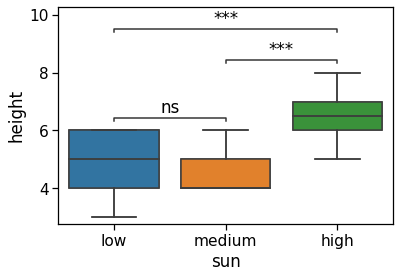

In [40]:
with sns.plotting_context('notebook', font_scale = 1.4):
    # Create new plot
    ax = sns.boxplot('sun', 'height', data = df)

    # Plot with seaborn
    sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    # Label and show
    
    plt.show()

In [41]:
# for main effect Water
res.tukey_hsd(df=df, res_var='height', xfac_var='water', anova_model='height ~ C(sun)+C(water)+C(sun):C(water)')
new=res.tukey_summary
print(new)

  group1  group2      Diff     Lower    Upper   q-value  p-value
0  daily  weekly  1.066667  0.516294  1.61704  5.656854    0.001


In [42]:
from statannotations.Annotator import Annotator
plotting_parameters = {
    'data':    df,
    'x':       'water',
    'y':       'height',
    
}

pairs = [('daily', 'weekly')]

In [43]:
pvalues =new['p-value']

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

daily vs. weekly: Custom statistical test, P_val:1.000e-03


C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


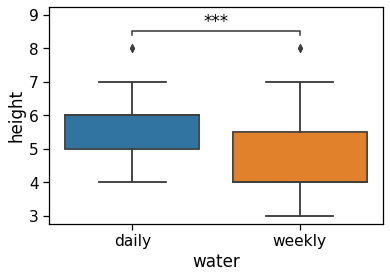

In [44]:
with sns.plotting_context('notebook', font_scale = 1.4):
    # Create new plot
    ax = sns.boxplot('water', 'height', data = df)

    # Plot with seaborn
    sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    # Label and show
    
    plt.show()

In [45]:
# for main effect Water and Sun
res.tukey_hsd(df=df, res_var='height', xfac_var=['sun','water'], anova_model='height ~ C(sun)+C(water)+C(sun):C(water)')
new = res.tukey_summary
print(new)

              group1            group2  Diff     Lower     Upper   q-value  \
0       (low, daily)     (low, weekly)   1.8  0.371833  3.228167  5.511352   
1       (low, daily)   (medium, daily)   0.8 -0.628167  2.228167  2.449490   
2       (low, daily)  (medium, weekly)   1.8  0.371833  3.228167  5.511352   
3       (low, daily)     (high, daily)   1.0 -0.428167  2.428167  3.061862   
4       (low, daily)    (high, weekly)   0.6 -0.828167  2.028167  1.837117   
5      (low, weekly)   (medium, daily)   1.0 -0.428167  2.428167  3.061862   
6      (low, weekly)  (medium, weekly)   0.0 -1.428167  1.428167  0.000000   
7      (low, weekly)     (high, daily)   2.8  1.371833  4.228167  8.573214   
8      (low, weekly)    (high, weekly)   2.4  0.971833  3.828167  7.348469   
9    (medium, daily)  (medium, weekly)   1.0 -0.428167  2.428167  3.061862   
10   (medium, daily)     (high, daily)   1.8  0.371833  3.228167  5.511352   
11   (medium, daily)    (high, weekly)   1.4 -0.028167  2.828167

In [46]:
samp = new.sample(4)

In [47]:
samp

,group1,group2,Diff,Lower,Upper,q-value,p-value
8,"(low, weekly)","(high, weekly)",2.4,0.971833,3.828167,7.348469,0.001000
1,"(low, daily)","(medium, daily)",0.8,-0.628167,2.228167,2.449490,0.522189
10,"(medium, daily)","(high, daily)",1.8,0.371833,3.228167,5.511352,0.007933
14,"(high, daily)","(high, weekly)",0.4,-1.028167,1.828167,1.224745,0.900000


In [48]:
g1 = samp['group1']
g2 = samp['group2']

In [51]:
g1

8       (low, weekly)
1        (low, daily)
10    (medium, daily)
14      (high, daily)
Name: group1, dtype: object

In [60]:
g2

8      (high, weekly)
1     (medium, daily)
10      (high, daily)
14     (high, weekly)
Name: group2, dtype: object

In [61]:
from statannotations.Annotator import Annotator
plotting_parameters = {
    'data':    df,
    'x':       ['sun','water'],
    'y':       'height',
    
}

pairs = [((g1[8]), (g2[8])),((g1[1]), (g2[1])),((g1[10]), (g2[10])),((g1[14]), (g2[14]))]

In [54]:
pvalues =samp['p-value']

In [ ]:
with sns.plotting_context('notebook', font_scale = 1.4):
    # Create new plot
    ax = sns.boxplot(['sun','water'], 'height', data = df)

    # Plot with seaborn
    sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    # Label and show
    
    plt.show()

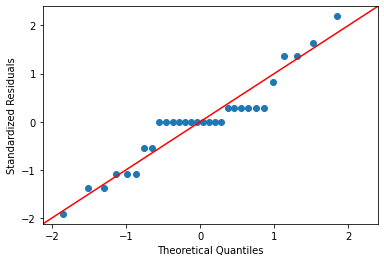

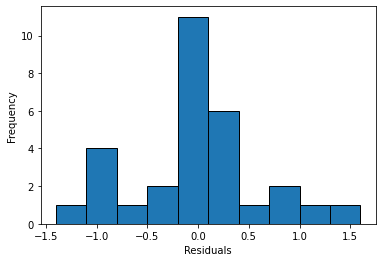

0.9254432320594788 0.037210531532764435


In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk test
import scipy.stats as stats
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)

In [ ]:
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# df['combination'] = df.sun + " / " + df.water
# m_comp = pairwise_tukeyhsd(endog=df['height'], groups=df['combination'], alpha=0.05)
# print(m_comp)


In [ ]:
# # coerce the tukeyhsd table to a DataFrame
# tukey_data = pd.DataFrame(data=m_comp._results_table.data[1:], columns = m_comp._results_table.data[0])

# group1_comp =tukey_data.loc[tukey_data.reject == True].groupby('group1').reject.count()
# group2_comp = tukey_data.loc[tukey_data.reject == True].groupby('group2').reject.count()
# tukey_data = pd.concat([group1_comp, group2_comp], axis=1)

# tukey_data = tukey_data.fillna(0)
# tukey_data.columns = ['reject1', 'reject2']
# tukey_data['total_sum'] = tukey_data.reject1 + tukey_data.reject2

# # just show the top 20 results
# tukey_data.sort_values('total_sum',ascending=False).head(5)

In [ ]:
# Another Way is pingoiun
import pingouin as pg 
# First calculate anova table 
aov = pg.anova(data = df , dv = 'height', between=['sun','water'], detailed=True)
print(aov)

        Source         SS  DF         MS        F     p-unc       np2
0          sun  24.866667   2  12.433333  23.3125  0.000002  0.660177
1        water   8.533333   1   8.533333  16.0000  0.000527  0.400000
2  sun * water   2.466667   2   1.233333   2.3125  0.120667  0.161572
3     Residual  12.800000  24   0.533333      NaN       NaN       NaN
